In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/USArrests.csv")
df.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [3]:
df.index = df.iloc[:,0]
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [4]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [5]:
df.head(2)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


In [6]:
df.index.name = None# USING NONE WILL MAKE THE INDEX VALUE AS NULL #

In [7]:
df.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FA3439BC8>,
      dtype=object)

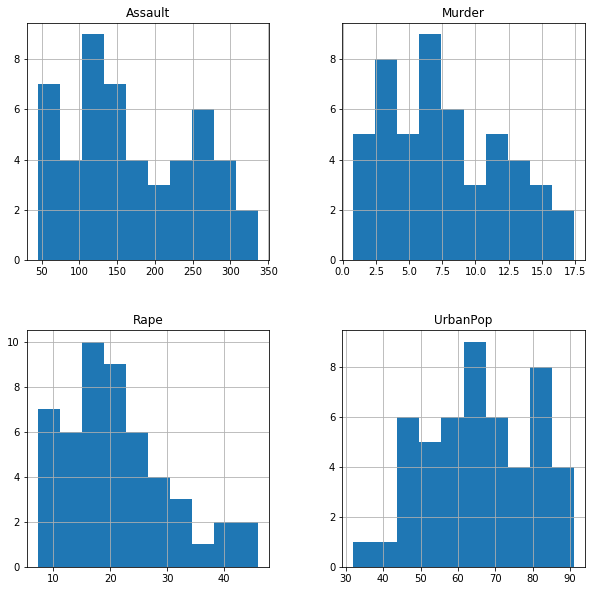

In [9]:
df.hist(figsize = (10,10))

In [11]:
crimes = df.loc[:,["Murder","Assault","UrbanPop","Rape"]].values

# CLUSTERING ANANLYSIS

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []

In [14]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(crimes)
    wcss.append(kmeans.inertia_)

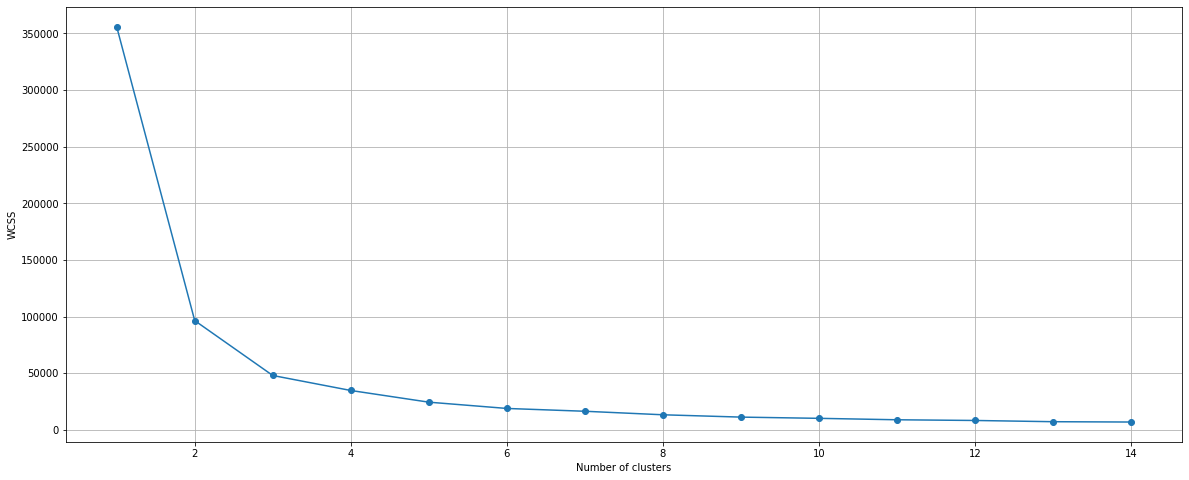

In [15]:
plt.figure(figsize = (20,8))
plt.plot(range(1,15), wcss, "-o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [16]:
x = df.loc[:,["Murder","Assault","UrbanPop","Rape"]].values

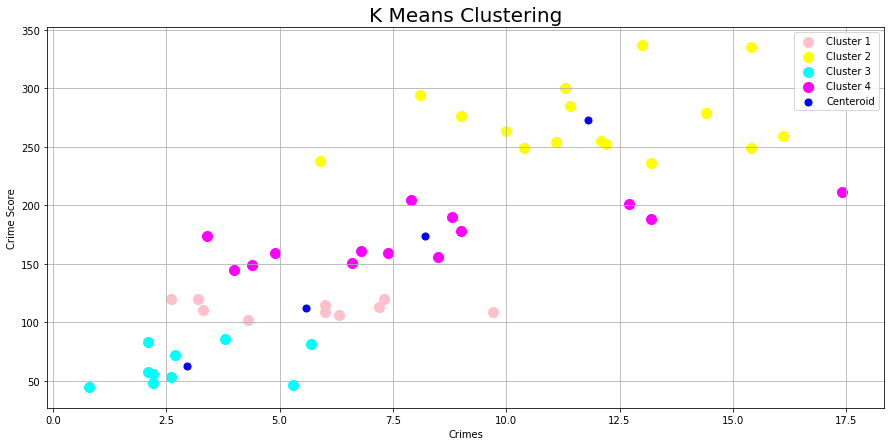

In [18]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize = (15,7))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Crimes')
plt.ylabel('Crime Score')
plt.legend()
plt.grid()
plt.show()